In [19]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("incomes.csv")

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,income,has_degree
0,62065,1
1,59342,1
2,79452,1
3,49138,1
4,62431,1
...,...,...
1879,73841,1
1880,68888,0
1881,48698,0
1882,64583,1


In [9]:
lm = LogisticRegression()

In [10]:
X = df["income"]
y = df["has_degree"]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   income      1884 non-null   int64
 1   has_degree  1884 non-null   int64
dtypes: int64(2)
memory usage: 29.6 KB


In [66]:
medians = []
for n in range(200):
    sample = np.random.choice(X, size=1874)
    med_sample = np.median(sample)
    medians.append(med_sample)

avg_median = np.mean(medians)

In [23]:
avg_median

60731.765

In [25]:
true_median = np.median(X)

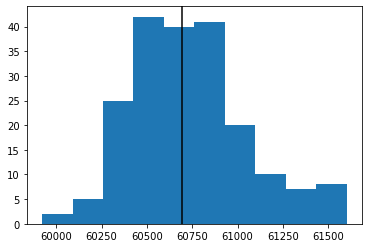

In [29]:
plt.hist(medians)
plt.axvline(true_median, color="black");

In [84]:
high_percentile = int(np.floor(200 * 0.975))

In [85]:
low_percentile = int(np.floor(200 * 0.025))

In [73]:
medians_array = np.array(medians)

In [76]:
medians_array.sort()

In [77]:
medians_array

array([59882. , 60027.5, 60222. , 60240.5, 60269. , 60269. , 60270.5,
       60294. , 60311.5, 60332. , 60347. , 60354. , 60365. , 60366. ,
       60370.5, 60373.5, 60375. , 60375. , 60375. , 60375. , 60404. ,
       60404. , 60409. , 60415.5, 60421.5, 60422. , 60427.5, 60430. ,
       60436. , 60438. , 60438. , 60439.5, 60441. , 60442.5, 60444.5,
       60447. , 60448. , 60448. , 60449. , 60450. , 60450. , 60483. ,
       60497.5, 60507. , 60511. , 60512. , 60512. , 60521.5, 60521.5,
       60525.5, 60535. , 60539. , 60539. , 60551. , 60557. , 60561.5,
       60563. , 60587. , 60587. , 60609. , 60609. , 60610. , 60616. ,
       60624. , 60624. , 60624. , 60631. , 60631. , 60638.5, 60638.5,
       60647.5, 60652. , 60652.5, 60652.5, 60653. , 60653. , 60653. ,
       60653. , 60662. , 60663. , 60663. , 60668. , 60671. , 60671. ,
       60673. , 60673. , 60673. , 60673. , 60678. , 60678. , 60684.5,
       60684.5, 60686. , 60686. , 60686. , 60691. , 60696. , 60696. ,
       60696. , 6071

In [86]:
ninety_medians = medians_array[low_percentile:high_percentile]

In [87]:
ninety_medians

array([60269. , 60270.5, 60294. , 60311.5, 60332. , 60347. , 60354. ,
       60365. , 60366. , 60370.5, 60373.5, 60375. , 60375. , 60375. ,
       60375. , 60404. , 60404. , 60409. , 60415.5, 60421.5, 60422. ,
       60427.5, 60430. , 60436. , 60438. , 60438. , 60439.5, 60441. ,
       60442.5, 60444.5, 60447. , 60448. , 60448. , 60449. , 60450. ,
       60450. , 60483. , 60497.5, 60507. , 60511. , 60512. , 60512. ,
       60521.5, 60521.5, 60525.5, 60535. , 60539. , 60539. , 60551. ,
       60557. , 60561.5, 60563. , 60587. , 60587. , 60609. , 60609. ,
       60610. , 60616. , 60624. , 60624. , 60624. , 60631. , 60631. ,
       60638.5, 60638.5, 60647.5, 60652. , 60652.5, 60652.5, 60653. ,
       60653. , 60653. , 60653. , 60662. , 60663. , 60663. , 60668. ,
       60671. , 60671. , 60673. , 60673. , 60673. , 60673. , 60678. ,
       60678. , 60684.5, 60684.5, 60686. , 60686. , 60686. , 60691. ,
       60696. , 60696. , 60696. , 60710.5, 60710.5, 60735. , 60767. ,
       60781. , 6078

(array([15., 22., 17., 42., 12., 30., 20., 12., 13.,  7.]),
 array([60269.  , 60381.75, 60494.5 , 60607.25, 60720.  , 60832.75,
        60945.5 , 61058.25, 61171.  , 61283.75, 61396.5 ]),
 <a list of 10 Patch objects>)

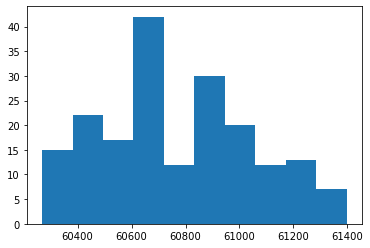

In [88]:
plt.hist(ninety_medians)

In [119]:
coef_list = []
int_list = []
model = LogisticRegression()

for n in range(200):
    sample_index = np.random.choice(range(len(df)), 1874)
    first_row = df.iloc[sample_index[0]]
    sample_df = pd.DataFrame(first_row)
    
    for index in sample_index[1:]:
        sample_row = df.iloc[index]
        sample_df = pd.concat([sample_df, sample_row], axis=1)
        
    sample_df = sample_df.T 

    X = np.array(sample_df["income"]).reshape(-1, 1)
    y = sample_df["has_degree"]
    model.fit(X, y)
    coefficients = model.coef_
    coef_list.append(coefficients)
    intercept = model.intercept_
    int_list.append(intercept)


In [123]:
coef_list

[array([[1.11127174e-05]]),
 array([[1.3467374e-05]]),
 array([[1.29708459e-05]]),
 array([[1.24553416e-05]]),
 array([[1.3671877e-05]]),
 array([[1.35591992e-05]]),
 array([[1.25433142e-05]]),
 array([[1.28783891e-05]]),
 array([[1.19121968e-05]]),
 array([[1.26866353e-05]]),
 array([[1.35371959e-05]]),
 array([[1.2025088e-05]]),
 array([[1.30875428e-05]]),
 array([[1.24899766e-05]]),
 array([[1.30146547e-05]]),
 array([[1.45933154e-05]]),
 array([[1.27391582e-05]]),
 array([[1.41092299e-05]]),
 array([[1.24860108e-05]]),
 array([[1.33281124e-05]]),
 array([[1.40410902e-05]]),
 array([[1.18321411e-05]]),
 array([[1.41375202e-05]]),
 array([[1.47547479e-05]]),
 array([[1.32182449e-05]]),
 array([[1.32264987e-05]]),
 array([[1.25272308e-05]]),
 array([[1.16388153e-05]]),
 array([[1.3529944e-05]]),
 array([[1.22847559e-05]]),
 array([[1.37079059e-05]]),
 array([[1.2182128e-05]]),
 array([[1.32817435e-05]]),
 array([[1.33759168e-05]]),
 array([[1.25377521e-05]]),
 array([[1.33536289e-05]]

/Users/anterra/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


IndexError: boolean index did not match indexed array along dimension 1; dimension is 1 but corresponding boolean dimension is 200

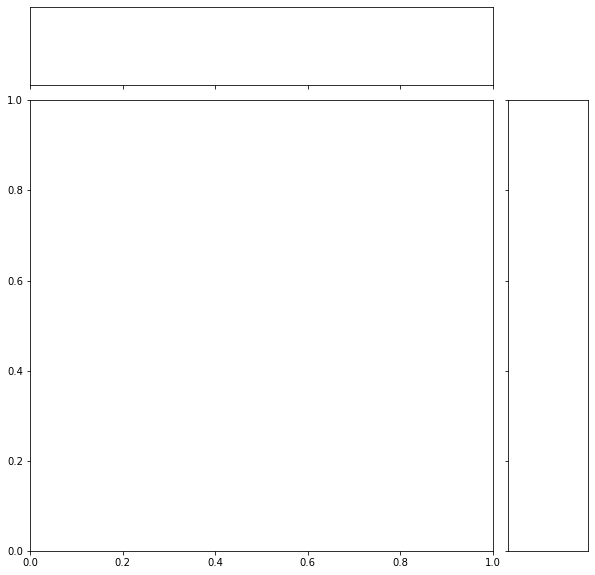

In [120]:
import seaborn as sns
sns.jointplot(coef_list, int_list, size=10)